<a href="https://colab.research.google.com/github/Altemir1/Crypto-DL-Based-Trading-System/blob/main/technical_indicators_analysis_on_cryptocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing raw dataset into dataframe**

In [40]:
import pandas as pd

df = pd.read_csv("/content/ETHUSDT_1d_candlesticks.csv")

df.head()

,Open Time,Open,High,Low,Close,Volume
0,2017-08-17,301.13,312.18,298.00,302.00,7030.71034
1,2017-08-18,302.00,311.79,283.94,293.96,9537.84646
2,2017-08-19,293.31,299.90,278.00,290.91,2146.19773
3,2017-08-20,289.41,300.53,282.85,299.10,2510.13871
4,2017-08-21,299.10,346.52,294.60,323.29,5219.44542


**Renaming columns in low case**.

In [41]:
df.rename(columns={"Open Time": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"}, inplace=True)

**Transform volume into usd format.**

---
Volume in dataset is presented in number of tokens



In [42]:
df["volume_usd"] = df["volume"] * df["close"]

# Technical Indicators

In [43]:
!pip install ta

In [44]:
!pip install mplfinance

Library for the techinal indicators

In [45]:
import ta

Libraries for the visaulization technical indicators

In [46]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mdates

### Trend indicators

Trend indicators are used to identify the direction of the market. Is it up, down or sideways.

List of TI
- EMA5, EMA20, EMA50. Exponential moving averages. These indicators smoothes fluctations of candles and show the direction of crypto price. The numbers are indicating the rolling window. How many past elements are used to calculate moving average
- MACD. Moving average convergence divergence. It uses difference between 12 and 26 EMAs and EMA of 9 period as a signal line. This indicator is used to identify shifts in the momentum of securities.
- ADI. Average directional index. Identifies the strength of the trend, regardless direction. 25>= identifies strong trend 20< for weak trend.
- PSAR. Parabolic stop and reverse. Puts dots above and below price to show potential reversial in the price.

In [47]:
# EMA
df["ema_5"] = ta.trend.ema_indicator(df["close"], window=5) # short-term
df["ema_20"] = ta.trend.ema_indicator(df["close"], window=20) # middle-term
df["ema_50"] = ta.trend.ema_indicator(df["close"], window=50) # long-term

# MACD
from ta.trend import MACD

macd = MACD(close=df['close'])

df['macd'] = macd.macd()
df['signal'] = macd.macd_signal()
df['histogram'] = macd.macd_diff()

#ADX
from ta.trend import ADXIndicator

adx = ADXIndicator(high=df['high'], low=df['low'], close=df['close'], window=14)

df['adx'] = adx.adx()
df['plus_di'] = adx.adx_pos()
df['minus_di'] = adx.adx_neg()

#PSAR
from ta.trend import PSARIndicator

psar = PSARIndicator(high=df["high"], low=df["low"], close=df['close'], step=0.02, max_step=2, fillna=True)

df['psar'] = psar.psar()
df['psar_down'] = psar.psar_down()
df['psar_up'] = psar.psar_up()

In [48]:
df.index = pd.to_datetime(df["date"])

In [49]:
df_trend = df.dropna()

In [50]:
print(df_trend.index[0])
print(df_trend.index[-1])


2017-10-05 00:00:00
2025-02-15 00:00:00


In [51]:
df

,date,open,high,low,close,volume,volume_usd,ema_5,ema_20,ema_50,macd,signal,histogram,adx,plus_di,minus_di,psar,psar_down,psar_up
date,,,,,,,,,,,,,,,,,,,
2017-08-17,2017-08-17,301.13,312.18,298.00,302.00,7030.71034,2.123275e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,302.000000,312.180000,278.00000
2017-08-18,2017-08-18,302.00,311.79,283.94,293.96,9537.84646,2.803745e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,293.960000,312.180000,278.00000
2017-08-19,2017-08-19,293.31,299.90,278.00,290.91,2146.19773,6.243504e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,312.180000,312.180000,278.00000
2017-08-20,2017-08-20,289.41,300.53,282.85,299.10,2510.13871,7.507825e+05,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,311.790000,311.790000,278.00000
2017-08-21,2017-08-21,299.10,346.52,294.60,323.29,5219.44542,1.687395e+06,306.015185,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,278.000000,311.790000,278.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11,2025-02-11,2661.19,2725.04,2558.24,2602.59,484196.14350,1.260164e+09,2651.265775,2897.105770,3118.940629,-188.679954,-157.450010,-31.229944,41.716106,8.090144,32.176571,3061.783423,3061.783423,3005.00494
2025-02-12,2025-02-12,2602.59,2795.45,2546.92,2738.27,646295.89590,1.769733e+09,2680.267183,2881.978554,3104.012369,-177.778222,-161.515652,-16.262570,42.330207,9.759054,29.523477,3024.312486,3024.312486,3005.00494
2025-02-13,2025-02-13,2738.27,2757.28,2612.76,2675.87,443769.28530,1.187469e+09,2678.801455,2862.349168,3087.222472,-172.188794,-163.650281,-8.538514,42.900443,9.279884,28.073874,2988.340386,2988.340386,3005.00494


Visualization of trend indicators

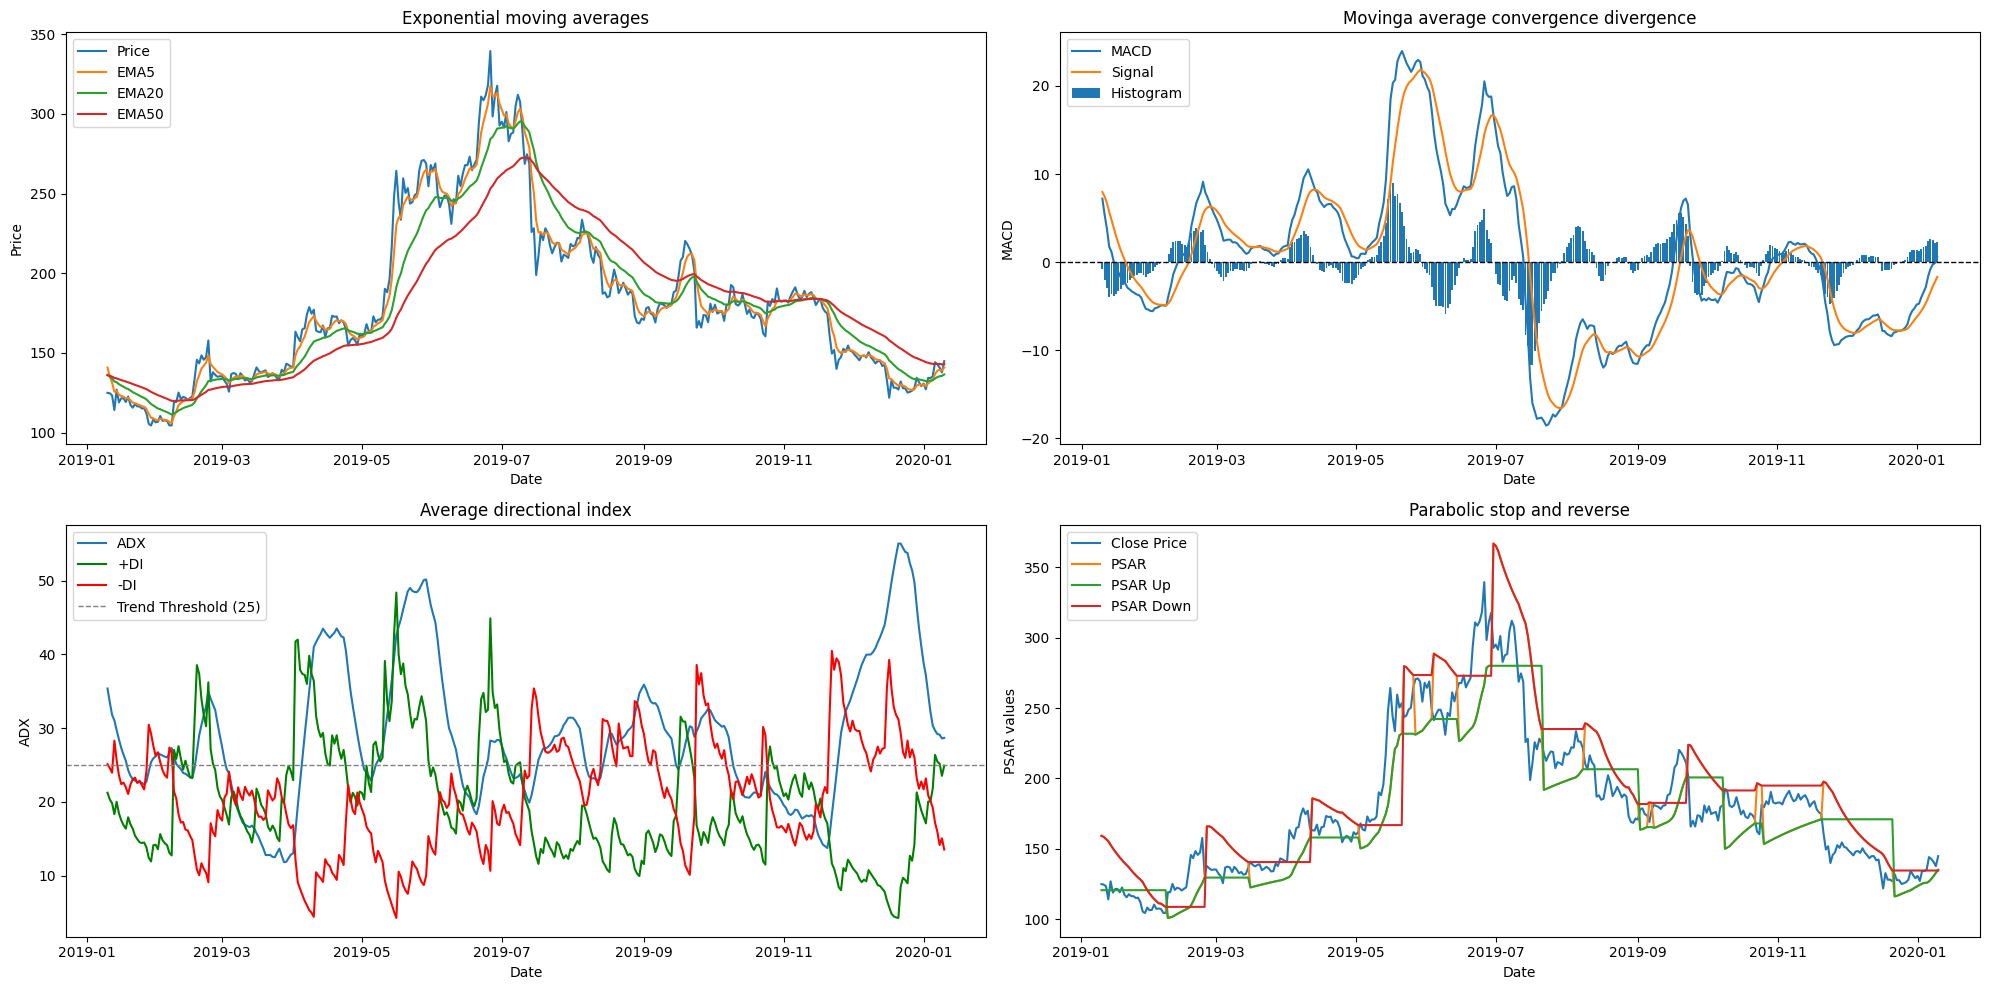

In [52]:
# Select specific range of the date to see characteristics. Available range(2017-10-05 : 2025-02-15)
start_date = "2019-01-10"
end_date = "2020-01-10"

df_range = df_trend.loc[start_date:end_date]

# Creating collage of four indicators for specified period
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Exponential moving averages against price
axs[0, 0].plot(df_range.index, df_range["close"], label="Price")
axs[0, 0].plot(df_range.index, df_range["ema_5"], label="EMA5")
axs[0, 0].plot(df_range.index, df_range["ema_20"], label="EMA20")
axs[0, 0].plot(df_range.index, df_range["ema_50"], label="EMA50")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Price")
axs[0, 0].set_title("Exponential moving averages")
axs[0, 0].legend(loc="upper left")

# MACD
axs[0, 1].plot(df_range.index, df_range["macd"], label="MACD")
axs[0, 1].plot(df_range.index, df_range["signal"], label="Signal")
axs[0, 1].bar(df_range.index, df_range["histogram"], label="Histogram")
axs[0, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("MACD")
axs[0, 1].set_title("Movinga average convergence divergence")
axs[0, 1].legend(loc="upper left")

# ADX
axs[1, 0].plot(df_range.index, df_range["adx"], label="ADX")
axs[1, 0].plot(df_range.index, df_range["plus_di"], label="+DI", color="green")
axs[1, 0].plot(df_range.index, df_range["minus_di"], label="-DI", color="red")
axs[1, 0].axhline(25, color='gray', linestyle='--', linewidth=1, label='Trend Threshold (25)')
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("ADX")
axs[1, 0].set_title("Average directional index")
axs[1, 0].legend(loc="upper left")

# PSAR against price
axs[1, 1].plot(df_range.index, df_range['close'], label="Close Price")
axs[1, 1].plot(df_range.index, df_range['psar'], label="PSAR")
axs[1, 1].plot(df_range.index, df_range["psar_up"], label="PSAR Up")
axs[1, 1].plot(df_range.index, df_range["psar_down"], label="PSAR Down")
axs[1, 1].set_ylabel("PSAR values")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_title("Parabolic stop and reverse")
axs[1, 1].legend(loc="upper left")

plt.tight_layout()
plt.show()

### Momentum indicators



Momentum indicators are used for identifying strength and movement of the trend potentially showing reversals

List of MI
- Relative strength index(RSI). Shows if the price of the security oversold or overbought
- Stochaistic oscialtor. As relative index shows the overbought or oversold state, but uses different values for it, 80 and 20 for previous states respectively.
- Commodity channel index(CCI). Calcualtes deviation of the price from statistical average

In [53]:
# Relative strength index
df["rsi"] = ta.momentum.rsi(df["close"])


# Stochaistic oscialtor
from ta.momentum import StochasticOscillator
stoch = StochasticOscillator(high=df["high"], low=df["low"], close=df["close"])
df['%K'] = stoch.stoch()
df['%D'] = stoch.stoch_signal()

# CCI
df["cci"] = ta.trend.cci(df["high"], df["low"], df["close"])

# Momentum with 10 days shift
df["momentum"] = df["close"].shift(-10) - df["close"]


In [54]:
df_momentum = df.dropna()

In [55]:
df_momentum.set_index("date", inplace=True)

In [56]:
df_momentum

,open,high,low,close,volume,volume_usd,ema_5,ema_20,ema_50,macd,...,plus_di,minus_di,psar,psar_down,psar_up,rsi,%K,%D,cci,momentum
date,,,,,,,,,,,,,,,,,,,,,
2017-10-05,290.00,297.44,285.53,294.81,3.412390e+03,1.006007e+06,295.022651,292.872474,297.807203,-0.127515,...,14.497030,27.115071,239.410566,313.943083,239.410566,50.345023,69.678280,67.161506,39.736154,43.15
2017-10-06,294.78,310.80,293.78,310.80,3.541024e+03,1.100550e+06,300.281767,294.579858,298.316724,1.257621,...,17.752581,25.735758,242.354144,313.943083,242.354144,55.521917,96.199689,77.126263,107.487298,24.39
2017-10-07,309.90,318.50,303.60,311.01,2.165791e+03,6.735826e+05,303.857845,296.144633,298.814500,2.345263,...,19.305122,24.557998,245.179978,313.943083,245.179978,55.587406,83.168539,83.015503,143.653366,4.18
2017-10-08,311.08,317.07,309.00,311.07,2.960932e+03,9.210571e+05,306.261897,297.566097,299.295107,3.175463,...,18.803214,23.919523,249.579179,313.943083,249.579179,55.607517,83.303371,87.557200,134.753675,-1.37
2017-10-09,311.13,312.13,286.65,297.19,4.885379e+03,1.451886e+06,303.237931,297.530278,299.212554,2.682481,...,17.275984,29.101174,253.714428,313.943083,253.714428,49.970160,52.112360,72.861423,38.800234,11.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,3300.99,3331.98,3101.70,3117.54,3.540653e+05,1.103813e+09,3192.030566,3259.258320,3324.852252,-58.416333,...,16.515550,21.562531,3005.004940,3438.086327,3005.004940,42.773228,22.488932,42.227485,-72.248553,-514.95
2025-02-02,3117.54,3163.20,2750.71,2869.68,1.050806e+06,3.015477e+09,3084.580377,3222.155623,3307.002360,-82.380570,...,14.155309,30.641337,3437.310000,3437.310000,3005.004940,35.282139,16.923668,32.881199,-249.601405,-131.41
2025-02-03,2869.68,2921.00,2125.01,2879.90,2.807979e+06,8.086699e+09,3016.353585,3189.559849,3290.253248,-99.401890,...,10.913966,41.624606,3423.578000,3423.578000,3005.004940,35.781554,57.524194,32.312265,-315.205446,-204.03


Visualizing momentum indicators

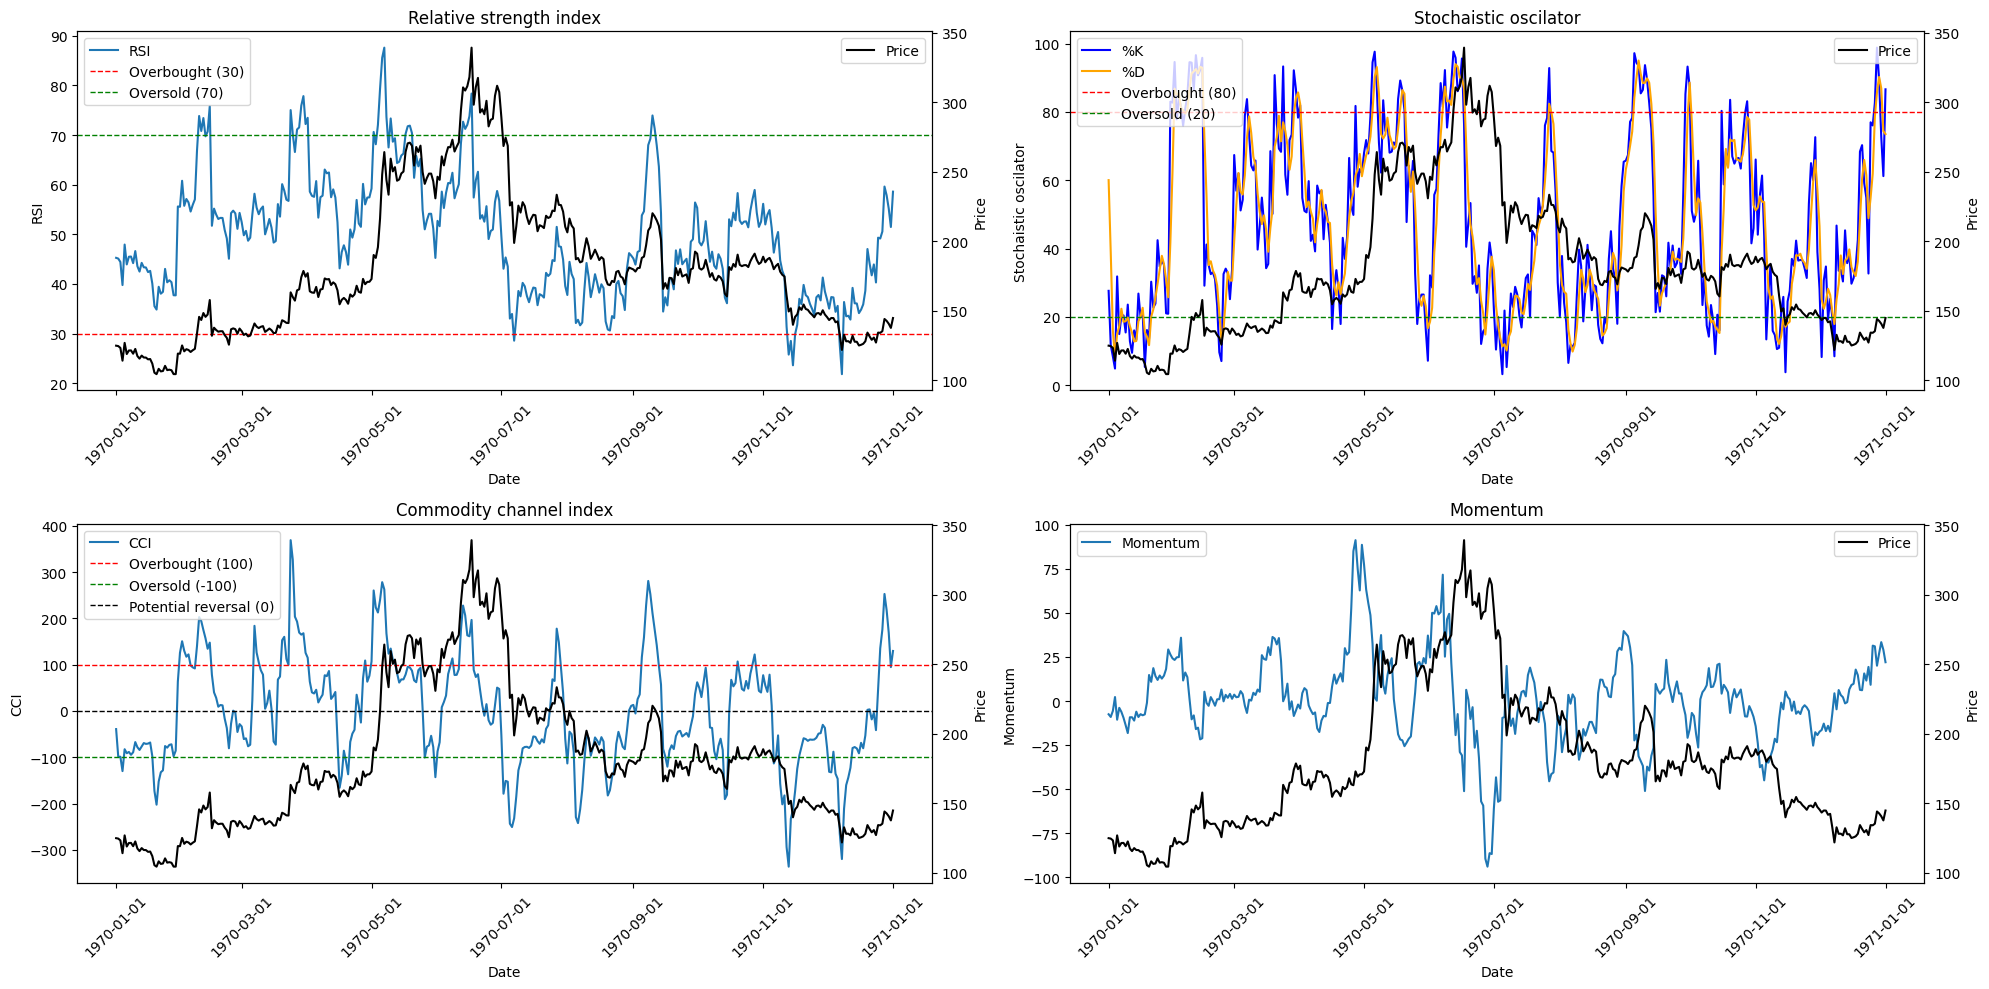

In [57]:
# Select specific range of the date to see characteristics. Available range(2017-10-05 : 2025-02-15)
df_range = df_momentum.loc[start_date:end_date]

# Creating collage of four indicators for specified period
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Relative strenght index shows overbought or oversold state
axs[0,0].plot(df_range.index, df_range["rsi"], label="RSI")
axs[0,0].axhline(30, color='red', linestyle='--', linewidth=1, label='Overbought (30)')
axs[0,0].axhline(70, color='green', linestyle='--', linewidth=1, label='Oversold (70)')
axs[0,0].set_xlabel("Date")
axs[0,0].set_ylabel("RSI")
axs[0,0].set_title("Relative strength index")
axs[0,0].legend(loc="upper left")
axs_price = axs[0,0].twinx()
axs_price.plot(df_range.index, df_range["close"], label="Price", color="black")
axs_price.set_ylabel("Price")
axs_price.legend(loc="upper right")


# Stochaistic oscilator
axs[0, 1].plot(df_range.index, df_range["%K"], label="%K", color="blue")
axs[0, 1].plot(df_range.index, df_range["%D"], label="%D", color="orange")
axs[0, 1].axhline(80, color='red', linestyle='--', linewidth=1, label='Overbought (80)')
axs[0, 1].axhline(20, color='green', linestyle='--', linewidth=1, label='Oversold (20)')
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Stochaistic oscilator")
axs[0, 1].set_title("Stochaistic oscilator")
axs[0, 1].legend(loc="upper left")
axs_price = axs[0,1].twinx()
axs_price.plot(df_range.index, df_range["close"], label="Price", color="black")
axs_price.set_ylabel("Price")
axs_price.legend(loc="upper right")


# CCI
axs[1, 0].plot(df_range.index, df_range["cci"], label="CCI")
axs[1, 0].axhline(100, color='red', linestyle='--', linewidth=1, label='Overbought (100)')
axs[1, 0].axhline(-100, color='green', linestyle='--', linewidth=1, label='Oversold (-100)')
axs[1, 0].axhline(0, color="black", linestyle='--', linewidth=1, label='Potential reversal (0)')
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("CCI")
axs[1, 0].set_title("Commodity channel index")
axs[1, 0].legend(loc="upper left")
axs_price = axs[1,0].twinx()
axs_price.plot(df_range.index, df_range["close"], label="Price", color="black")
axs_price.set_ylabel("Price")
axs_price


# PSAR against price
axs[1, 1].plot(df_range.index, df_range['momentum'], label="Momentum")
axs[1, 1].set_ylabel("Momentum")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_title("Momentum")
axs[1, 1].legend(loc="upper left")
axs_price = axs[1, 1].twinx()
axs_price.plot(df_range.index, df_range["close"], label="Price", color="black")
axs_price.set_ylabel("Price")
axs_price.legend(loc="upper right")

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())   # auto spacing
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format
    ax.tick_params(axis='x', rotation=45)  # rotate for readability

plt.tight_layout()
plt.tight_layout()
plt.show()

### Volatility indicators

Volatility indicators shows how turbulent and unstable market is.

List of VI
- Bollinger bands. Gives the range of lower and upper deviation from average of the price. The wider range between bands shows higher volatility.
- Average true range (ATR). Calculates average range of the price movement
- Keltner channel. Similar to the bollinger bands that shows range between moving average, but instead of standard deviation uses ATR.
- Donchain channel. Shows min and max values over given window.

In [58]:
# Bollinger bands
bb = ta.volatility.BollingerBands(df['close'], window=20)
df['bb_upper'] = bb.bollinger_hband()
df['bb_lower'] = bb.bollinger_lband()
df["bb_middle"] = bb.bollinger_mavg()

# Average true range
df["atr"] = ta.volatility.AverageTrueRange(df["high"], df["low"], df["close"]).average_true_range()

# Keltner channel
from ta.volatility import KeltnerChannel
kc = KeltnerChannel(high=df['high'], low=df['low'], close=df['close'], window=20, window_atr=10)

df['kc_middle'] = kc.keltner_channel_mband()
df['kc_upper'] = kc.keltner_channel_hband()
df['kc_lower'] = kc.keltner_channel_lband()

# Donchain channel

window = 20
df['donchian_upper'] = df['high'].rolling(window=window).max()
df['donchian_lower'] = df['low'].rolling(window=window).min()
df['donchian_middle'] = (df['donchian_upper'] + df['donchian_lower']) / 2

In [59]:
df_volatility = df.dropna()

In [60]:
df_volatility.set_index("date", inplace=True)

In [61]:
df_volatility

,open,high,low,close,volume,volume_usd,ema_5,ema_20,ema_50,macd,...,bb_upper,bb_lower,bb_middle,atr,kc_middle,kc_upper,kc_lower,donchian_upper,donchian_lower,donchian_middle
date,,,,,,,,,,,,,,,,,,,,,
2017-10-05,290.00,297.44,285.53,294.81,3.412390e+03,1.006007e+06,295.022651,292.872474,297.807203,-0.127515,...,319.402479,253.314521,286.3585,24.322341,285.443667,307.145167,263.742167,313.00,235.51,274.255
2017-10-06,294.78,310.80,293.78,310.80,3.541024e+03,1.100550e+06,300.281767,294.579858,298.316724,1.257621,...,319.417220,259.448780,289.4330,23.800745,288.089500,308.827000,267.352000,313.00,239.02,276.010
2017-10-07,309.90,318.50,303.60,311.01,2.165791e+03,6.735826e+05,303.857845,296.144633,298.814500,2.345263,...,319.679211,264.532789,292.1060,23.164977,290.958667,311.172667,270.744667,318.50,252.10,285.300
2017-10-08,311.08,317.07,309.00,311.07,2.960932e+03,9.210571e+05,306.261897,297.566097,299.295107,3.175463,...,321.710713,264.151287,292.9310,22.086765,292.279333,310.441333,274.117333,318.50,252.10,285.300
2017-10-09,311.13,312.13,286.65,297.19,4.885379e+03,1.451886e+06,303.237931,297.530278,299.212554,2.682481,...,322.124819,265.056181,293.5905,22.329139,292.855333,311.161833,274.548833,318.50,252.10,285.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,3300.99,3331.98,3101.70,3117.54,3.540653e+05,1.103813e+09,3192.030566,3259.258320,3324.852252,-58.416333,...,3463.668099,3057.628901,3260.6485,190.297436,3263.560833,3472.306833,3054.814833,3525.72,2920.00,3222.860
2025-02-02,3117.54,3163.20,2750.71,2869.68,1.050806e+06,3.015477e+09,3084.580377,3222.155623,3307.002360,-82.380570,...,3508.098493,2986.415507,3247.2570,206.168333,3253.345500,3461.766000,3044.925000,3525.72,2750.71,3138.215
2025-02-03,2869.68,2921.00,2125.01,2879.90,2.807979e+06,8.086699e+09,3016.353585,3189.559849,3290.253248,-99.401890,...,3536.139864,2923.801136,3229.9705,248.298452,3225.311500,3466.980500,2983.642500,3525.72,2125.01,2825.365


Visualization of volatility indicators

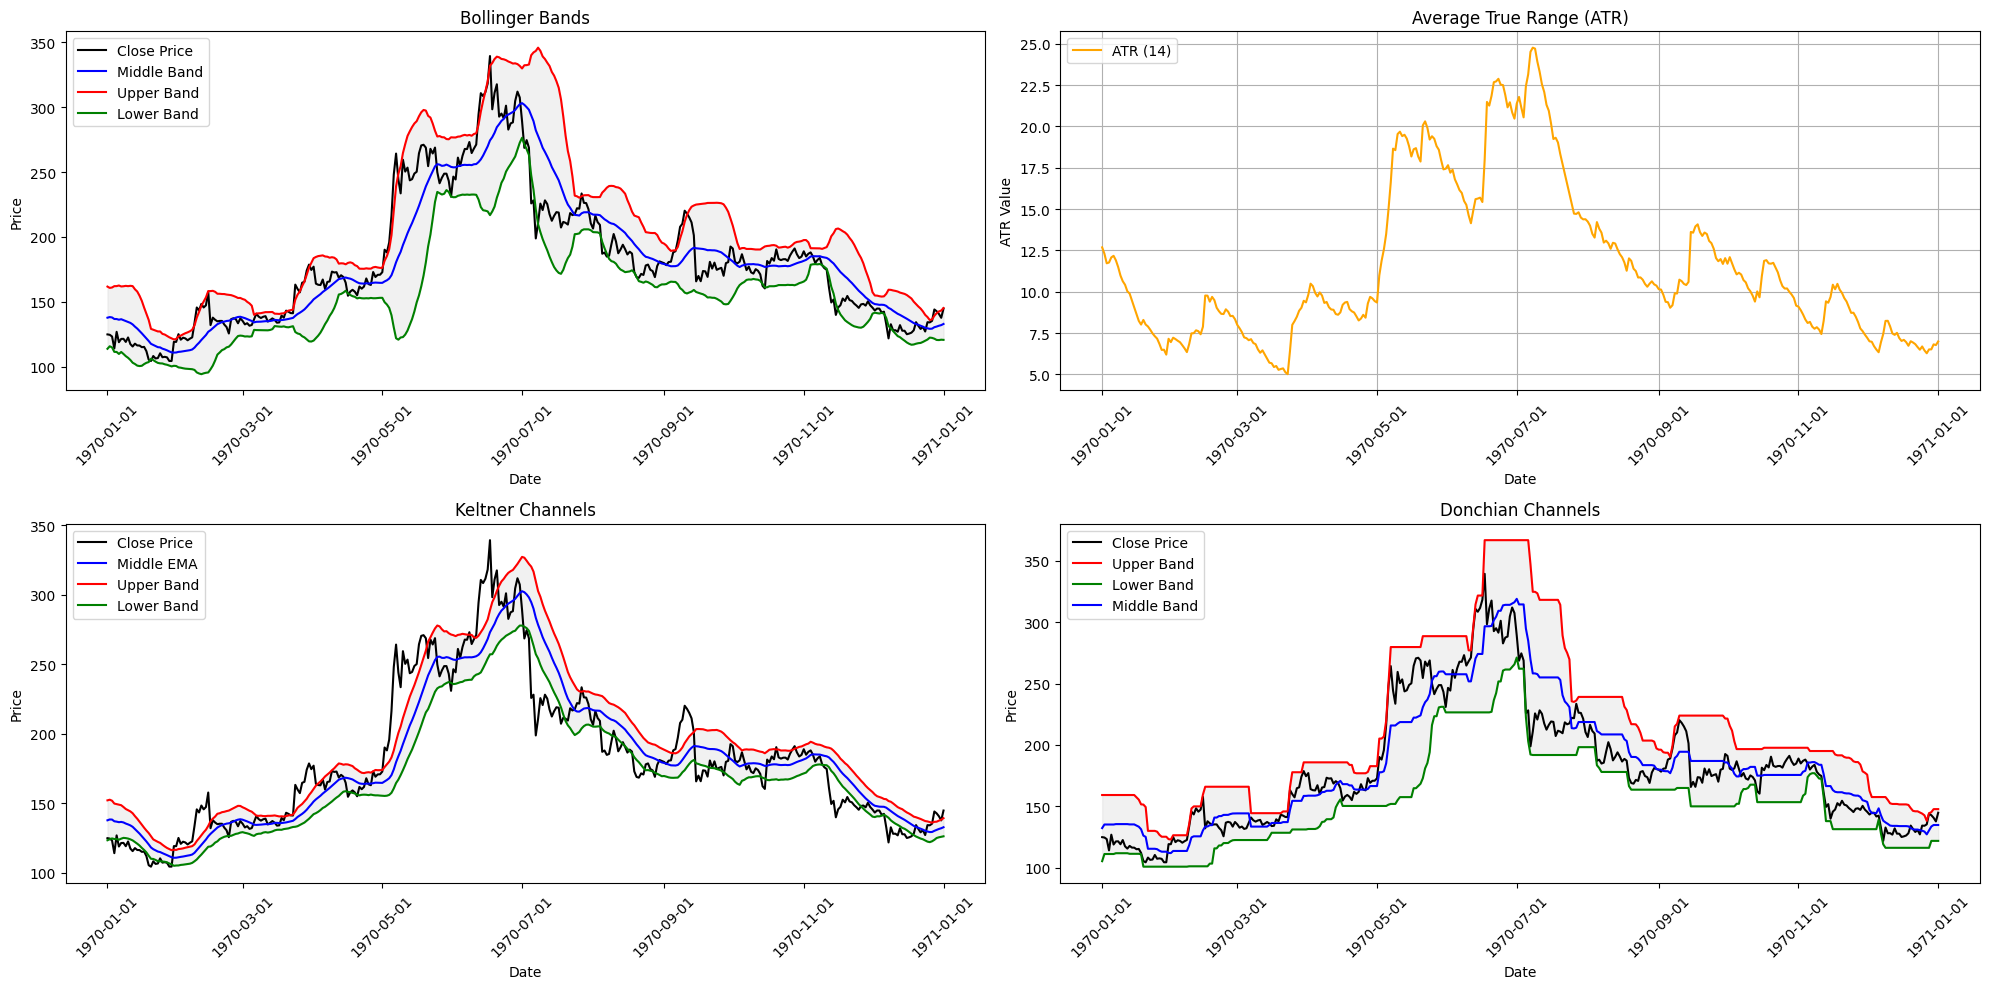

In [63]:
# Define the date range
start_date = "2019-01-10"
end_date = "2020-01-10"
df_vol_range = df_volatility.loc[start_date:end_date]

# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Bollinger Bands
axs[0, 0].plot(df_vol_range.index, df_vol_range['close'], label='Close Price', color='black')
axs[0, 0].plot(df_vol_range.index, df_vol_range['bb_middle'], label='Middle Band', color='blue')
axs[0, 0].plot(df_vol_range.index, df_vol_range['bb_upper'], label='Upper Band', color='red')
axs[0, 0].plot(df_vol_range.index, df_vol_range['bb_lower'], label='Lower Band', color='green')
axs[0, 0].fill_between(df_vol_range.index, df_vol_range['bb_lower'], df_vol_range['bb_upper'], color='lightgray', alpha=0.3)
axs[0, 0].set_title("Bollinger Bands")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Price")
axs[0, 0].legend(loc="upper left")

# Average True Range (ATR)
axs[0, 1].plot(df_vol_range.index, df_vol_range['atr'], label='ATR (14)', color='orange')
axs[0, 1].set_title("Average True Range (ATR)")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("ATR Value")
axs[0, 1].legend(loc="upper left")
axs[0, 1].grid(True)

# Keltner Channels
axs[1, 0].plot(df_vol_range.index, df_vol_range['close'], label='Close Price', color='black')
axs[1, 0].plot(df_vol_range.index, df_vol_range['kc_middle'], label='Middle EMA', color='blue')
axs[1, 0].plot(df_vol_range.index, df_vol_range['kc_upper'], label='Upper Band', color='red')
axs[1, 0].plot(df_vol_range.index, df_vol_range['kc_lower'], label='Lower Band', color='green')
axs[1, 0].fill_between(df_vol_range.index, df_vol_range['kc_lower'], df_vol_range['kc_upper'], color='lightgray', alpha=0.3)
axs[1, 0].set_title("Keltner Channels")
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("Price")
axs[1, 0].legend(loc="upper left")

# Donchian Channels
axs[1, 1].plot(df_vol_range.index, df_vol_range['close'], label='Close Price', color='black')
axs[1, 1].plot(df_vol_range.index, df_vol_range['donchian_upper'], label='Upper Band', color='red')
axs[1, 1].plot(df_vol_range.index, df_vol_range['donchian_lower'], label='Lower Band', color='green')
axs[1, 1].plot(df_vol_range.index, df_vol_range['donchian_middle'], label='Middle Band', color='blue')
axs[1, 1].fill_between(df_vol_range.index, df_vol_range['donchian_lower'], df_vol_range['donchian_upper'], color='lightgray', alpha=0.3)
axs[1, 1].set_title("Donchian Channels")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Price")
axs[1, 1].legend(loc="upper left")

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())   # auto spacing
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format
    ax.tick_params(axis='x', rotation=45)  # rotate for readability

plt.tight_layout()
plt.tight_layout()
plt.show()

### Volume based indicators

Volume indicators measure the strength and conviction behind price movements by analyzing trading volume. High volume confirms trends and breakouts, while low volume may signal weakness or fakeouts.

List of VI
-	On-Balance Volume (OBV). Tracks cumulative buying and selling pressure by adding volume on up days and subtracting it on down days. A rising OBV confirms an uptrend; a falling OBV suggests a downtrend.
- Volume Weighted Average Price (VWAP). Calculates the average price weighted by volume. Prices above VWAP suggest bullish bias, while prices below VWAP suggest bearish sentiment.
- Chaikin Money Flow (CMF). Combines price and volume to show buying or selling pressure over a period. Positive CMF values indicate accumulation (buying); negative values indicate distribution (selling).
- Accumulation/Distribution Line (A/D Line). Measures supply and demand by examining where the price closes in the day’s range and multiplies it by volume. Used to detect divergences between volume flow and price direction.

In [64]:
from ta.volume import OnBalanceVolumeIndicator, ChaikinMoneyFlowIndicator, AccDistIndexIndicator

# OBV (On-Balance Volume)
obv = OnBalanceVolumeIndicator(close=df['close'], volume=df['volume'])
df['obv'] = obv.on_balance_volume()

# VWAP (manual implementation)
# VWAP typically calculated intraday — here's a daily approximation
df['vwap_num'] = (df['close'] * df['volume']).cumsum()
df['vwap_denom'] = df['volume'].cumsum()
df['vwap'] = df['vwap_num'] / df['vwap_denom']

# Chaikin Money Flow (CMF)
cmf = ChaikinMoneyFlowIndicator(high=df['high'], low=df['low'],
                                 close=df['close'], volume=df['volume'], window=20)
df['cmf'] = cmf.chaikin_money_flow()

# Accumulation/Distribution Line (A/D Line)
ad = AccDistIndexIndicator(high=df['high'], low=df['low'],
                           close=df['close'], volume=df['volume'])
df['ad_line'] = ad.acc_dist_index()

In [65]:
df_volume = df.dropna()

In [66]:
df_volume.set_index("date", inplace=True)

In [67]:
df_volume

,open,high,low,close,volume,volume_usd,ema_5,ema_20,ema_50,macd,...,kc_lower,donchian_upper,donchian_lower,donchian_middle,obv,vwap_num,vwap_denom,vwap,cmf,ad_line
date,,,,,,,,,,,,,,,,,,,,,
2017-10-05,290.00,297.44,285.53,294.81,3.412390e+03,1.006007e+06,295.022651,292.872474,297.807203,-0.127515,...,263.742167,313.00,235.51,274.255,-2.587271e+04,8.192443e+07,2.723347e+05,300.822589,0.105217,2.546977e+04
2017-10-06,294.78,310.80,293.78,310.80,3.541024e+03,1.100550e+06,300.281767,294.579858,298.316724,1.257621,...,267.352000,313.00,239.02,276.010,-2.233168e+04,8.302498e+07,2.758757e+05,300.950654,0.183252,2.901079e+04
2017-10-07,309.90,318.50,303.60,311.01,2.165791e+03,6.735826e+05,303.857845,296.144633,298.814500,2.345263,...,270.744667,318.50,252.10,285.300,-2.016589e+04,8.369857e+07,2.780415e+05,301.029011,0.163131,2.899917e+04
2017-10-08,311.08,317.07,309.00,311.07,2.960932e+03,9.210571e+05,306.261897,297.566097,299.295107,3.175463,...,274.117333,318.50,252.10,285.300,-1.720496e+04,8.461962e+07,2.810025e+05,301.134813,0.121816,2.755722e+04
2017-10-09,311.13,312.13,286.65,297.19,4.885379e+03,1.451886e+06,303.237931,297.530278,299.212554,2.682481,...,274.548833,318.50,252.10,285.300,-2.209034e+04,8.607151e+07,2.858878e+05,301.067403,0.116781,2.671360e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,3300.99,3331.98,3101.70,3117.54,3.540653e+05,1.103813e+09,3192.030566,3259.258320,3324.852252,-58.416333,...,3054.814833,3525.72,2920.00,3222.860,4.524672e+07,2.154698e+12,1.428346e+09,1508.526774,-0.039243,1.309601e+08
2025-02-02,3117.54,3163.20,2750.71,2869.68,1.050806e+06,3.015477e+09,3084.580377,3222.155623,3307.002360,-82.380570,...,3044.925000,3525.72,2750.71,3138.215,4.419591e+07,2.157713e+12,1.429396e+09,1509.527411,-0.080683,1.305155e+08
2025-02-03,2869.68,2921.00,2125.01,2879.90,2.807979e+06,8.086699e+09,3016.353585,3189.559849,3290.253248,-99.401890,...,2983.642500,3525.72,2125.01,2825.365,4.700389e+07,2.165800e+12,1.432204e+09,1512.214163,0.102394,1.330335e+08


Visualization of Volume indicators

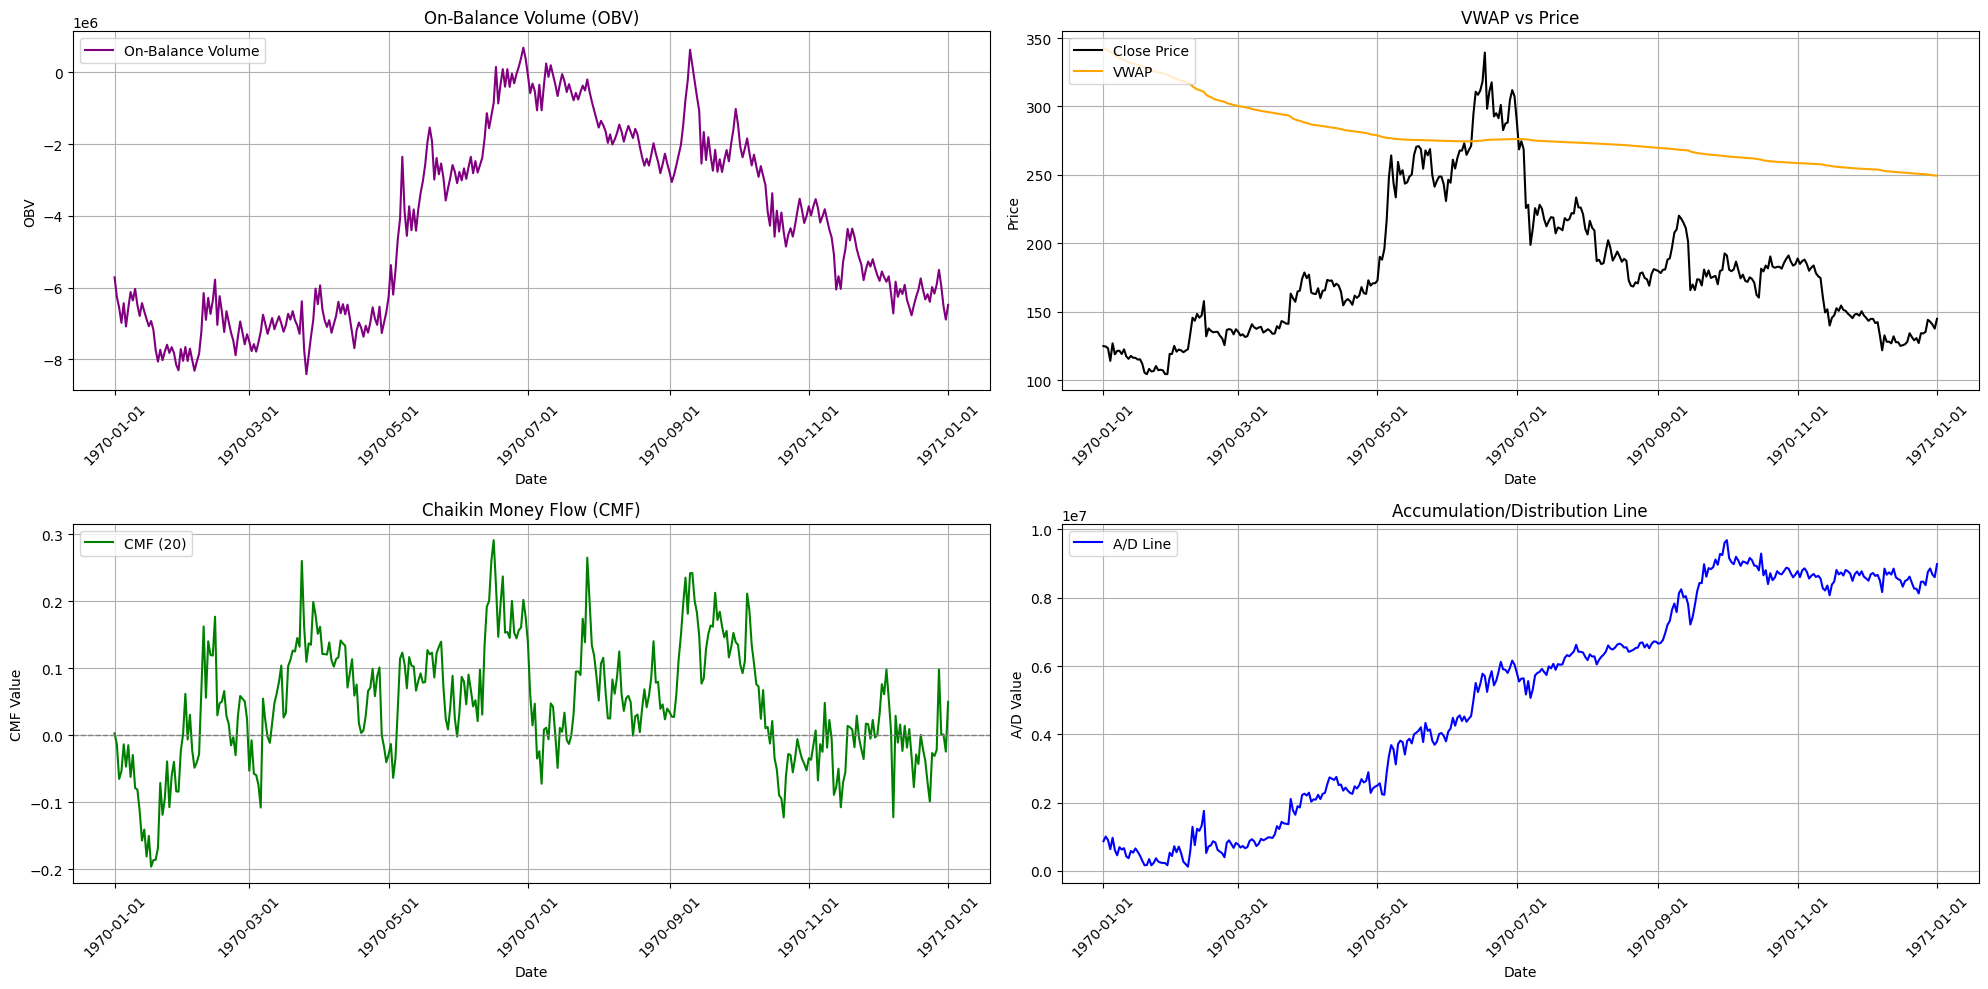

In [68]:

# Define date range
start_date = "2019-01-10"
end_date = "2020-01-10"
df_vol_range = df_volume.loc[start_date:end_date]

# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# OBV
axs[0, 0].plot(df_vol_range.index, df_vol_range['obv'], label='On-Balance Volume', color='purple')
axs[0, 0].set_title("On-Balance Volume (OBV)")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("OBV")
axs[0, 0].legend(loc="upper left")
axs[0, 0].grid(True)

# VWAP vs Close Price
axs[0, 1].plot(df_vol_range.index, df_vol_range['close'], label='Close Price', color='black')
axs[0, 1].plot(df_vol_range.index, df_vol_range['vwap'], label='VWAP', color='orange')
axs[0, 1].set_title("VWAP vs Price")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Price")
axs[0, 1].legend(loc="upper left")
axs[0, 1].grid(True)

# Chaikin Money Flow
axs[1, 0].plot(df_vol_range.index, df_vol_range['cmf'], label='CMF (20)', color='green')
axs[1, 0].axhline(0, linestyle='--', color='gray', linewidth=1)
axs[1, 0].set_title("Chaikin Money Flow (CMF)")
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("CMF Value")
axs[1, 0].legend(loc="upper left")
axs[1, 0].grid(True)

# Accumulation/Distribution Line
axs[1, 1].plot(df_vol_range.index, df_vol_range['ad_line'], label='A/D Line', color='blue')
axs[1, 1].set_title("Accumulation/Distribution Line")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("A/D Value")
axs[1, 1].legend(loc="upper left")
axs[1, 1].grid(True)


for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())   # auto spacing
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # format
    ax.tick_params(axis='x', rotation=45)  # rotate for readability


plt.tight_layout()
plt.show()

### Final dataset inspection

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2740 entries, 2017-08-17 to 2025-02-15
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2740 non-null   object 
 1   open             2740 non-null   float64
 2   high             2740 non-null   float64
 3   low              2740 non-null   float64
 4   close            2740 non-null   float64
 5   volume           2740 non-null   float64
 6   volume_usd       2740 non-null   float64
 7   ema_5            2736 non-null   float64
 8   ema_20           2721 non-null   float64
 9   ema_50           2691 non-null   float64
 10  macd             2715 non-null   float64
 11  signal           2707 non-null   float64
 12  histogram        2707 non-null   float64
 13  adx              2740 non-null   float64
 14  plus_di          2740 non-null   float64
 15  minus_di         2740 non-null   float64
 16  psar             2740 non-null   float64
 

In [70]:
df.dropna(inplace=True)

### Download processed dataset

In [71]:
df.to_csv("eth_ti_1d.csv")